## МГТУ им. Н. Э. Баумана
## Факультет: Информатика, искусственный интеллект и системы управления
## Кафедра: Системы обработки информации и управления
## Дисциплина: Методы машинного обучения
## Лабораторная работа №1 "Создание "истории о данных" (Data Storytelling)"
## Выполнил: Попов М. А. ИУ5-24М

Задание:

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
 - История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
 - На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
 - Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
 - Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
 - История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [7]:
data = pd.read_csv('gpu_specs_v6.csv')
data.head()

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.0,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.0,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.0,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512


In [8]:
data.dtypes

manufacturer      object
productName       object
releaseYear      float64
memSize          float64
memBusWidth      float64
gpuClock           int64
memClock         float64
unifiedShader    float64
tmu                int64
rop                int64
pixelShader      float64
vertexShader     float64
igp               object
bus               object
memType           object
gpuChip           object
dtype: object

Рассмотрим распределение тактовой частоты памяти

<AxesSubplot:xlabel='gpuClock', ylabel='Density'>

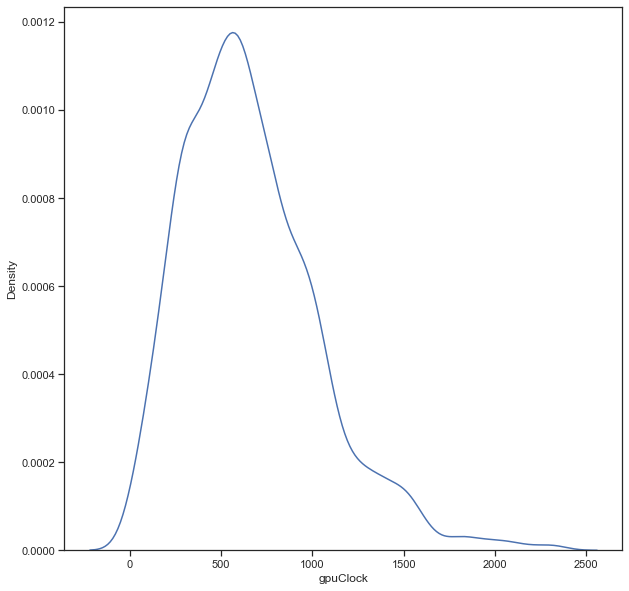

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(data=data, x="gpuClock")

Рассмотрим года выпуска процессоров

<AxesSubplot:xlabel='releaseYear', ylabel='Count'>

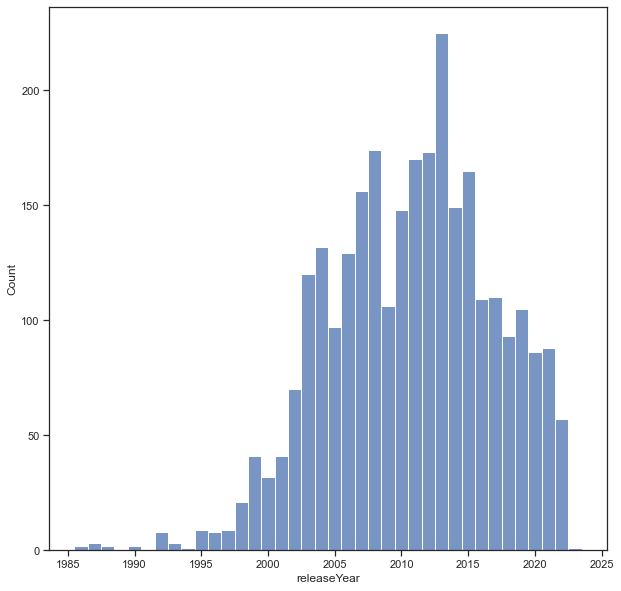

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data['releaseYear'], discrete=True)

Рассмотрим зависимость объём оперативной памяти от года выпуска на графике

<AxesSubplot:xlabel='memSize', ylabel='releaseYear'>

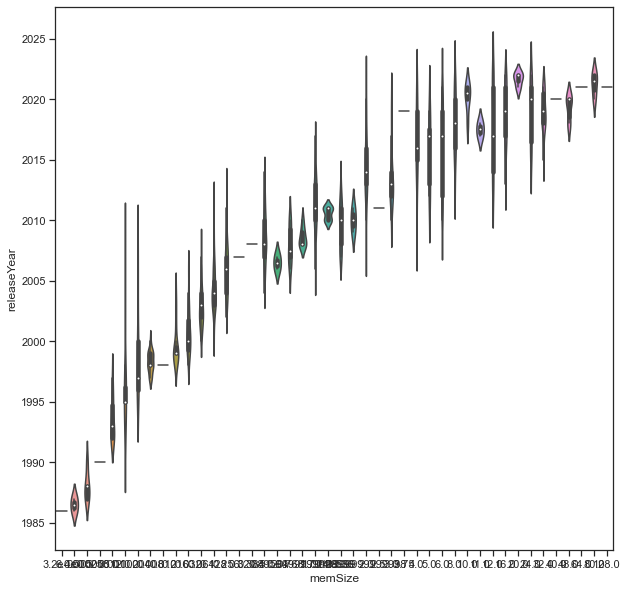

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(x='memSize', y='releaseYear', data=data)

Из графика видно, что наибольший объём оперативной памяти у рассматриваемых процессоров будет к 2025 году

<AxesSubplot:xlabel='memClock', ylabel='releaseYear'>

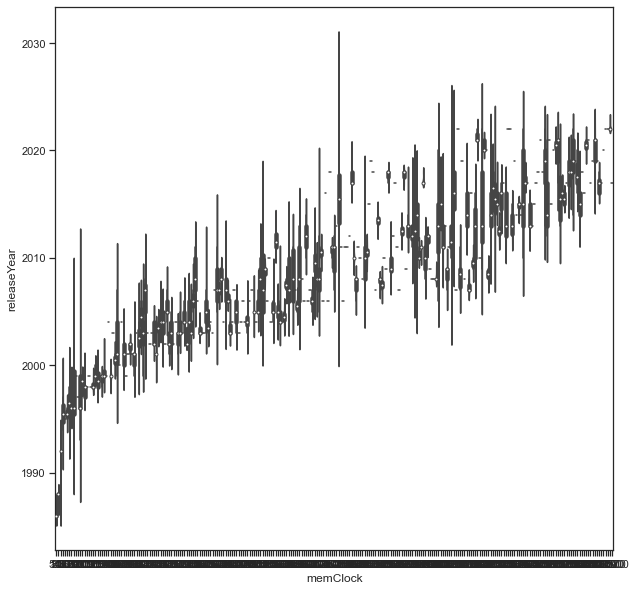

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(x='memClock', y='releaseYear', data=data)

Из графика видно, что наименьшая тактовая частота у процессоров была в 1990-ых годах

<AxesSubplot:xlabel='memClock', ylabel='releaseYear'>

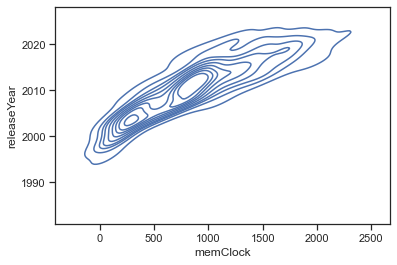

In [25]:
sns.kdeplot(data=data, x="memClock", y="releaseYear")

<AxesSubplot:xlabel='memClock', ylabel='releaseYear'>

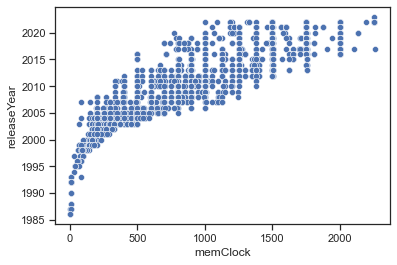

In [28]:
sns.scatterplot(x='memClock', y='releaseYear', data=data)

Text(0.5, 0.98, 'Корреляционные матрицы')

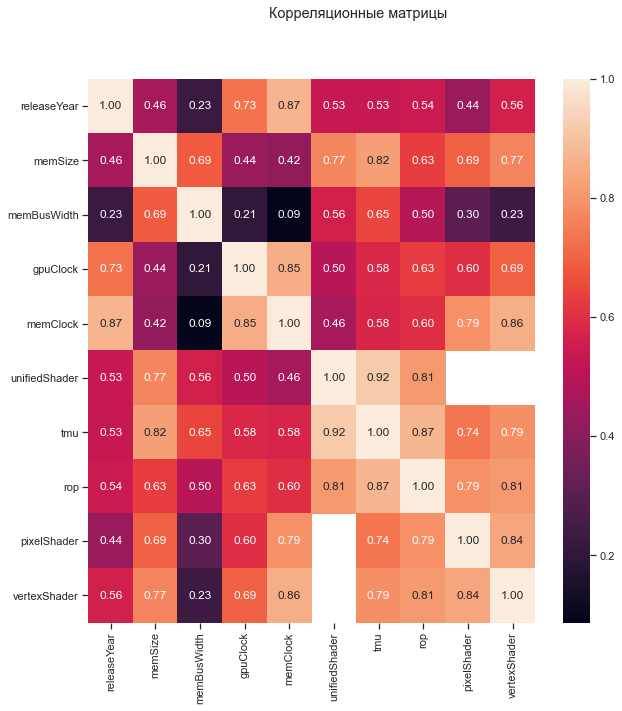

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы')

Построение диаграмм для набора данных

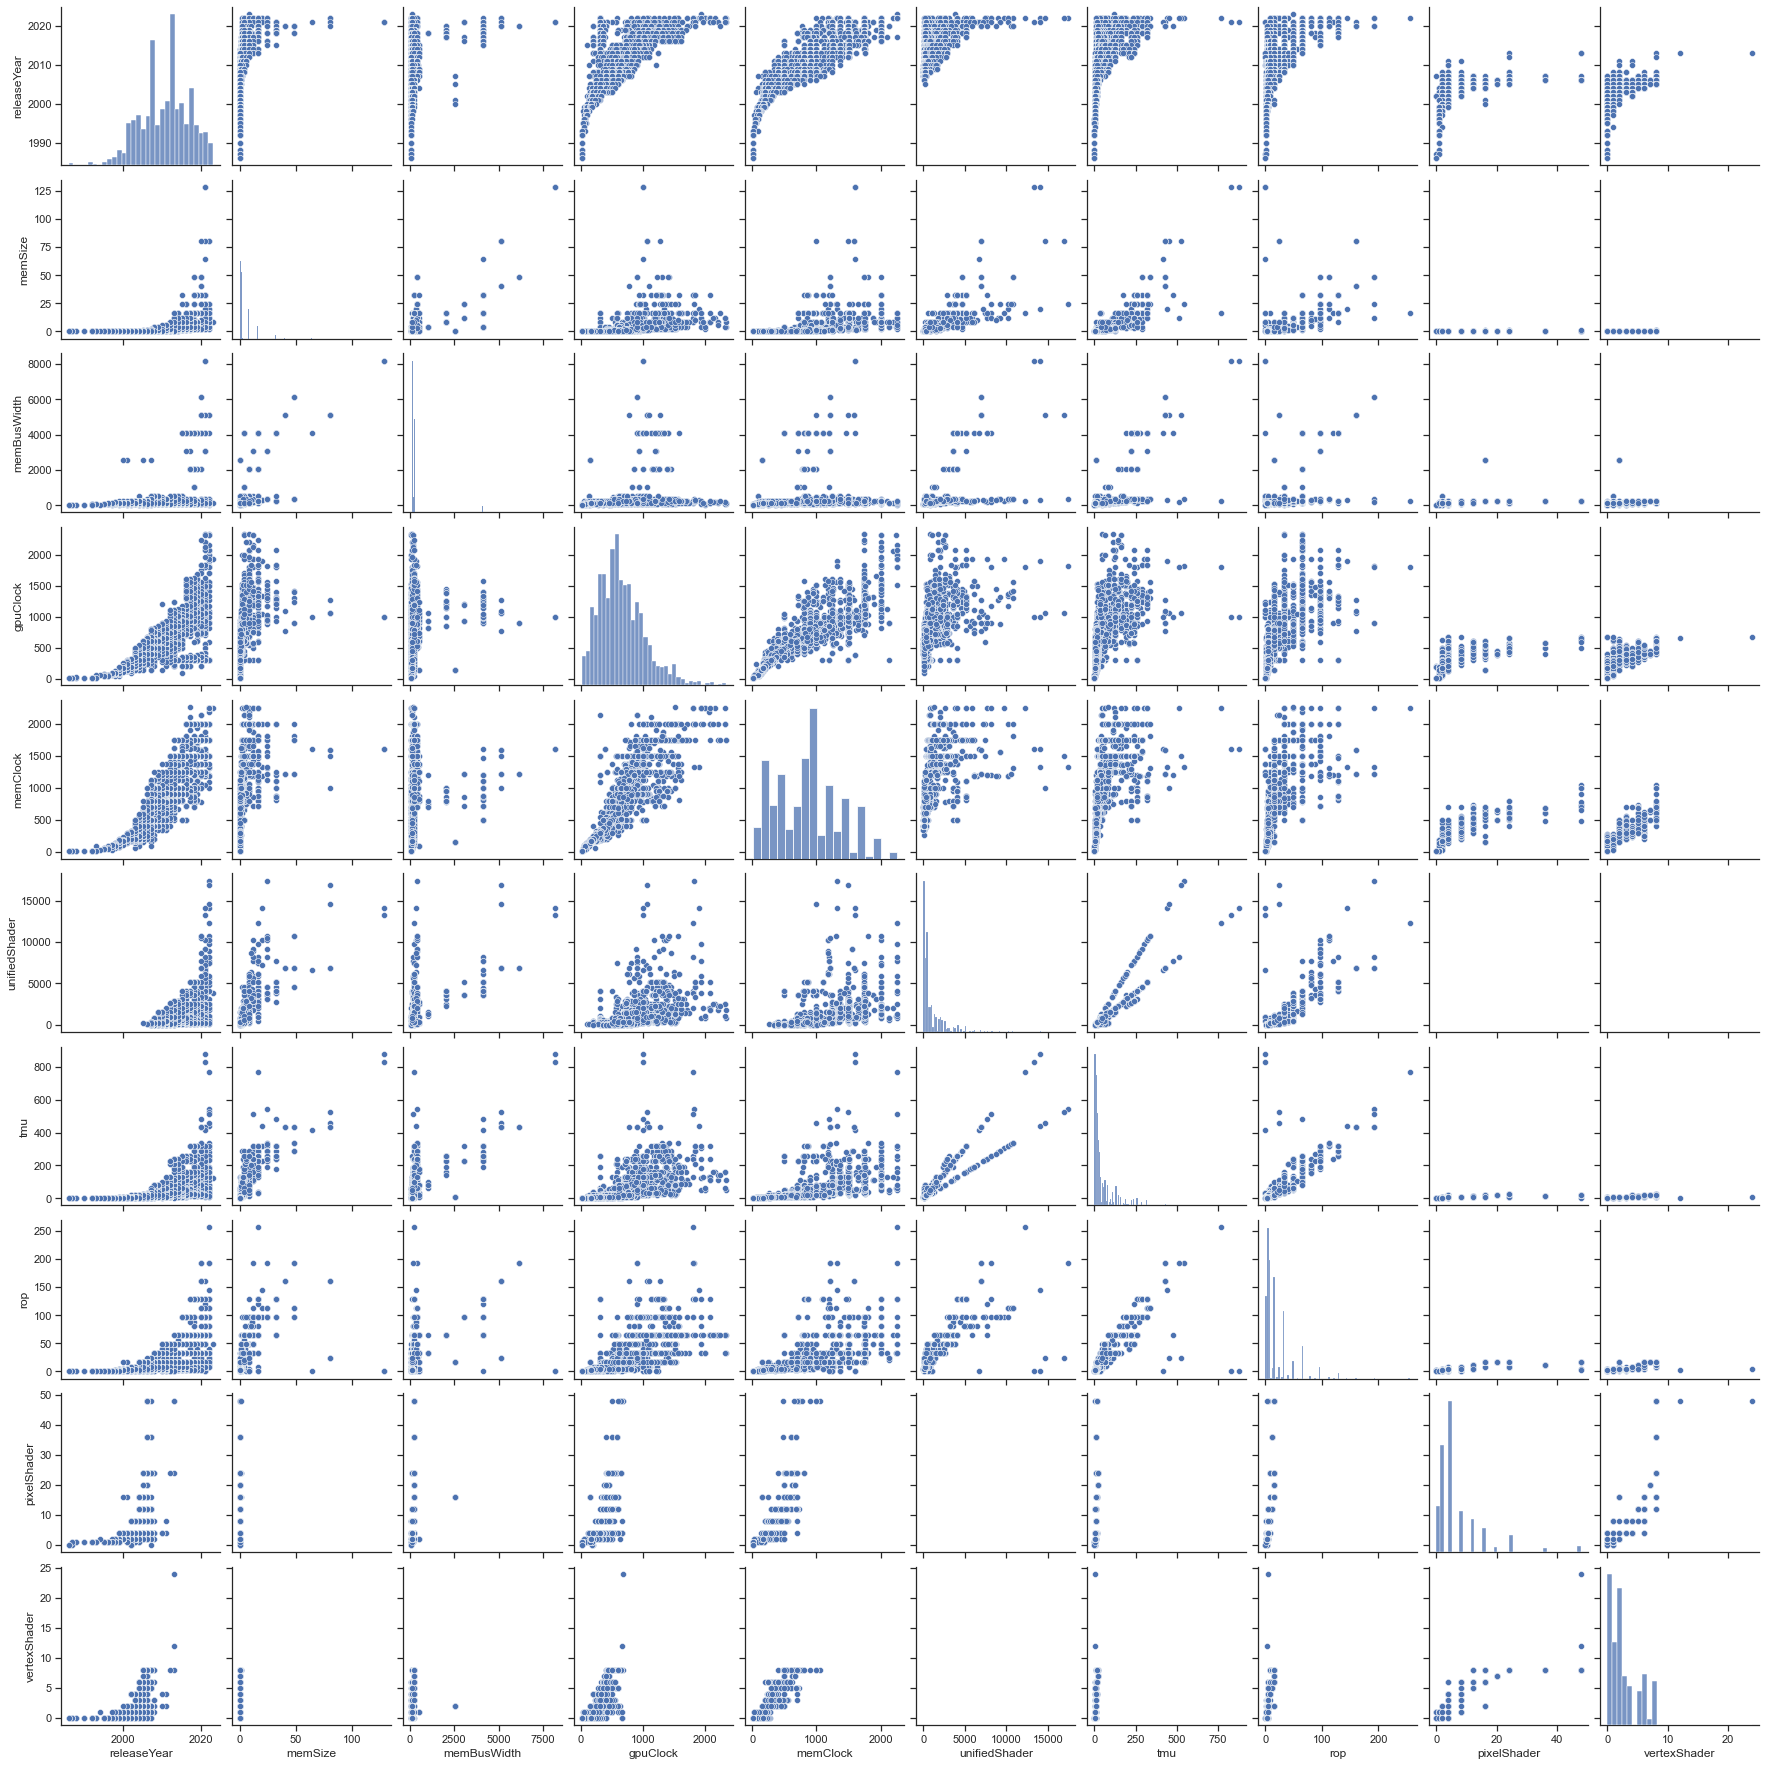

In [30]:
sns.pairplot(data)
plt.show()